In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"

clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Drug_group = combined_data.groupby(["Drug", "Timepoint"])
tumor_mean = Drug_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
Drug_group_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_mean})
# Preview DataFrame
Drug_group_df = Drug_group_df.reset_index()
Drug_group_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Drug_group = combined_data.groupby(["Drug", "Timepoint"])
tumor_sem = Drug_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
Drug_group_sem_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_sem})
# Preview DataFrame
Drug_group_sem_df = Drug_group_sem_df.reset_index()
Drug_group_sem_df




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_meanpivot = Drug_group_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_sempivot = Drug_group_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_meanpivot
#tumor_sempivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
Drug_pert =  (tumor_meanpivot.loc[45]-tumor_meanpivot.loc[0])/tumor_meanpivot.loc[0]*100
print(Drug_pert)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

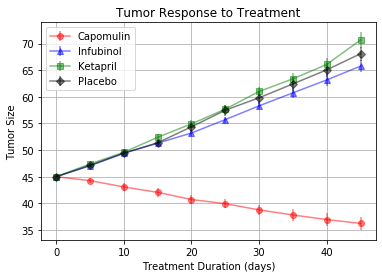

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_meanpivot.index,tumor_meanpivot["Capomulin"],yerr = tumor_sempivot["Capomulin"],fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin" )
plt.errorbar(tumor_meanpivot.index,tumor_meanpivot["Infubinol"],yerr = tumor_sempivot["Infubinol"],fmt = '-',marker = '^',color="b",
             alpha = 0.5, label="Infubinol" )
plt.errorbar(tumor_meanpivot.index,tumor_meanpivot["Ketapril"],yerr = tumor_sempivot["Ketapril"],fmt = '-',marker = 's',color="g",
             alpha = 0.5, label="Ketapril" )
plt.errorbar(tumor_meanpivot.index,tumor_meanpivot["Placebo"],yerr = tumor_sempivot["Placebo"],fmt = '-',marker = 'D', color="black",
             alpha = 0.5, label="Placebo"  )
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Tumor Size")
plt.legend(loc='upper left')
plt.grid()
# Save the Figure
#plt.savefig("../Analysis/Image1.png")
plt.show


In [13]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Drug_group = combined_data.groupby(["Drug", "Timepoint"])
metsite_mean = Drug_group["Metastatic Sites"].mean()

# Convert to DataFrame
Metsite_group_df = pd.DataFrame({"Metastatic Sites": metsite_mean})
# Preview DataFrame
Metsite_group_df = Metsite_group_df.reset_index()
Metsite_group_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Drug_group = combined_data.groupby(["Drug", "Timepoint"])
metsite_sem = Drug_group["Metastatic Sites"].sem()
# Convert to DataFrame
Metsite_sem_df = pd.DataFrame({"Metastatic Sites": metsite_sem})
# Preview DataFrame
Metsite_sem_df = Metsite_sem_df.reset_index()
Metsite_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
metsite_meanpivot = Metsite_group_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

metsite_sempivot = Metsite_sem_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metsite_meanpivot.head()
metsite_sempivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


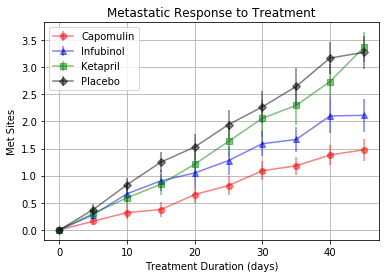

In [14]:
# Generate the Plot (with Error Bars)
plt.errorbar(metsite_meanpivot.index,metsite_meanpivot["Capomulin"],yerr = metsite_sempivot["Capomulin"],fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin" )
plt.errorbar(metsite_meanpivot.index,metsite_meanpivot["Infubinol"],yerr = metsite_sempivot["Infubinol"],fmt = '-',marker = '^',color="b",
             alpha = 0.5, label="Infubinol" )
plt.errorbar(metsite_meanpivot.index,metsite_meanpivot["Ketapril"],yerr = metsite_sempivot["Ketapril"],fmt = '-',marker = 's',color="g",
             alpha = 0.5, label="Ketapril" )
plt.errorbar(metsite_meanpivot.index,metsite_meanpivot["Placebo"],yerr = metsite_sempivot["Placebo"],fmt = '-',marker = 'D', color="black",
             alpha = 0.5, label="Placebo"  )
plt.title("Metastatic Response to Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met Sites")
plt.legend(loc='upper left')
plt.grid()
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Drug_group = combined_data.groupby(["Drug", "Timepoint"])
survival_count = Drug_group["Tumor Volume (mm3)"].count()
# Convert to DataFrame
survival_count_df = pd.DataFrame({"Mouse Count":survival_count }).reset_index()

# Preview DataFrame
survival_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot = survival_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
survival_percent = survival_pivot/25*100
# Preview the Data Frame
survival_percent.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


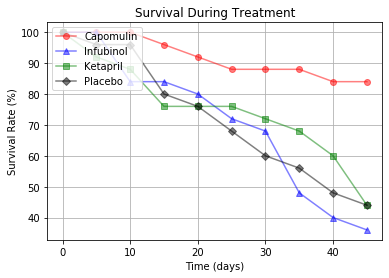

In [22]:
plt.errorbar(survival_percent.index,survival_percent["Capomulin"], marker = 'o',color="r",
             alpha = 0.5, label="Capomulin" )
plt.errorbar(survival_percent.index,survival_percent["Infubinol"],marker = '^',color="b",
             alpha = 0.5, label="Infubinol" )
plt.errorbar(survival_percent.index,survival_percent["Ketapril"],marker = 's',color="g",
             alpha = 0.5, label="Ketapril" )
plt.errorbar(survival_percent.index,survival_percent["Placebo"],marker = 'D', color="black",
             alpha = 0.5, label="Placebo"  )
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='upper left')
plt.grid()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug

# Display the data to confirm
Drug_pert =  (tumor_meanpivot.loc[45]-tumor_meanpivot.loc[0])/tumor_meanpivot.loc[0]*100


In [24]:
pct_drugchange = (Drug_pert["Capomulin"],
               Drug_pert["Infubinol"],
               Drug_pert["Ketapril"],
               Drug_pert["Placebo"])


In [25]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)